Problem: How to determine which stocks are most affected by the coronavirus?

Hypothesis: The stock market is inversely correlated with the infection rate of covid-19.

Solution: 
1. Pull coronavirus infection data by date
2. Download stock price information since the coronavirus infection began
3. Calculate correlation between confirmed cases and stock market prices
4. Evaluate percentage of market change for individual stocks
5. Data exploration into correlation between stock market price and infection rate

# **Covid-19 kaggle dataset**

https://www.kaggle.com/imdevskp/corona-virus-report/data

In [1]:
# Import libraries
import datetime
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import json
import numpy as np
import io


In [2]:
# Upload CSV file from local drive
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete (2).csv


In [3]:
# Store dataset in a Pandas Dataframe
import io
covid_df = pd.read_csv(io.BytesIO(uploaded['covid_19_clean_complete.csv']))
covid_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
# convert 'Date' to a datetime object
covid_df['Date'] = pd.to_datetime(covid_df.Date)

In [5]:
# Select Confirmed, Deaths and Revovered columns by date
covid_sum_df = covid_df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().sort_values('Date', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [6]:
# Dataframe Info
covid_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2020-01-22 to 2020-07-27
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  188 non-null    int64
 1   Deaths     188 non-null    int64
 2   Recovered  188 non-null    int64
dtypes: int64(3)
memory usage: 5.9 KB


In [7]:
covid_sum_df.head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


In [8]:
# Descriptive Stats
covid_sum_df.describe()

,Confirmed,Deaths,Recovered
count,1.880000e+02,188.000000,1.880000e+02
mean,4.406960e+06,230770.760638,2.066001e+06
std,4.757988e+06,217929.094183,2.627976e+06
min,5.550000e+02,17.000000,2.800000e+01
25%,1.121910e+05,3935.000000,6.044125e+04
50%,2.848733e+06,204190.000000,7.847840e+05
75%,7.422046e+06,418634.500000,3.416396e+06
max,1.648048e+07,654036.000000,9.468087e+06


# **Yfinance**

In [12]:
# Install yfinance
!pip install yfinance

     |████████████████████████████████| 5.5MB 5.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=6c6fd9c991cdceea126df71356bf237748a1436803f7d4316eab7fcc99f5933e
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [13]:
# Create datetime objects 
import datetime
from pandas_datareader import data as pdr
import yfinance as yf

# To grab stock data
yf.pdr_override()

In [14]:
# Set label for Dow 30
stocks = ["^IXIC", "^GSPC", "^DJI", "AXP", "AAPL", "BA", "CAT", "CSCO", "CVX", "XOM", "GS", "HD", "IBM", 
          "INTC", "JNJ", "KO", "JPM", "MCD", "MMM", "MRK", "MSFT", "NKE", "PFE",
          "PG", "TRV", "UNH", "UTX", "VZ", "V", "WBA", "WMT", "DIS", "DOW"]

# Set start and end dates
start = datetime.datetime(2020, 1, 1)
end   = datetime.datetime(2020, 4, 3)

# Grab data
data = pdr.get_data_yahoo(stocks, start = start, end = end)

[*********************100%***********************]  33 of 33 completed


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2020-01-02 to 2020-04-02
Columns: 198 entries, ('Adj Close', 'AAPL') to ('Volume', '^IXIC')
dtypes: float64(165), int64(33)
memory usage: 99.5 KB


In [16]:
data.head()

Adj Close              ...      Volume            
                 AAPL         AXP  ...       ^GSPC       ^IXIC
Date                               ...                        
2020-01-02  74.573036  124.071274  ...  3458250000  2848370000
2020-01-03  73.848030  122.838936  ...  3461290000  2567400000
2020-01-06  74.436470  122.306564  ...  3674070000  2788120000
2020-01-07  74.086395  121.665756  ...  3420380000  2352850000
2020-01-08  75.278160  123.765648  ...  3720890000  2464090000

[5 rows x 198 columns]

In [17]:
# Select only Adjusted Closed Stock Price
adj_close = ['Adj Close']
data[adj_close]

Adj Close              ...                          
                 AAPL         AXP  ...        ^GSPC        ^IXIC
Date                               ...                          
2020-01-02  74.573036  124.071274  ...  3257.850098  9092.190430
2020-01-03  73.848030  122.838936  ...  3234.850098  9020.769531
2020-01-06  74.436470  122.306564  ...  3246.280029  9071.469727
2020-01-07  74.086395  121.665756  ...  3237.179932  9068.580078
2020-01-08  75.278160  123.765648  ...  3253.050049  9129.240234
...               ...         ...  ...          ...          ...
2020-03-27  61.656628   87.475922  ...  2541.469971  7502.379883
2020-03-30  63.416183   88.994148  ...  2626.649902  7774.149902
2020-03-31  63.286770   84.400017  ...  2584.590088  7700.100098
2020-04-01  59.956806   76.739830  ...  2470.500000  7360.580078
2020-04-02  60.957287   75.996323  ...  2526.899902  7487.310059

[64 rows x 33 columns]

In [18]:
data[adj_close].describe()

Adj Close              ...                          
            AAPL         AXP  ...        ^GSPC        ^IXIC
count  64.000000   64.000000  ...    64.000000    64.000000
mean   72.739810  113.508576  ...  3038.457645  8729.611382
std     7.446392   20.595682  ...   356.053344   899.180827
min    55.840385   67.985336  ...  2237.399902  6860.669922
25%    67.585484   96.183578  ...  2733.789917  7931.730103
50%    74.925598  123.918461  ...  3240.404907  9110.715332
75%    79.058336  129.853374  ...  3317.805054  9374.049561
max    81.432350  134.994659  ...  3386.149902  9817.179688

[8 rows x 33 columns]

In [19]:
# Write adj_close dataframe to yfinance_df
yfinance_df = data[adj_close]

In [20]:
yfinance_df

Adj Close              ...                          
                 AAPL         AXP  ...        ^GSPC        ^IXIC
Date                               ...                          
2020-01-02  74.573036  124.071274  ...  3257.850098  9092.190430
2020-01-03  73.848030  122.838936  ...  3234.850098  9020.769531
2020-01-06  74.436470  122.306564  ...  3246.280029  9071.469727
2020-01-07  74.086395  121.665756  ...  3237.179932  9068.580078
2020-01-08  75.278160  123.765648  ...  3253.050049  9129.240234
...               ...         ...  ...          ...          ...
2020-03-27  61.656628   87.475922  ...  2541.469971  7502.379883
2020-03-30  63.416183   88.994148  ...  2626.649902  7774.149902
2020-03-31  63.286770   84.400017  ...  2584.590088  7700.100098
2020-04-01  59.956806   76.739830  ...  2470.500000  7360.580078
2020-04-02  60.957287   75.996323  ...  2526.899902  7487.310059

[64 rows x 33 columns]

# **Merge yfinance and covid_19 dataframes by date**

In [21]:
# Merge by yfinance and covid dataframes by Index
covid_yfinance_df = pd.merge(covid_sum_df,yfinance_df, how='inner', left_index=True, right_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [22]:
covid_yfinance_df.head()

,Confirmed,Deaths,Recovered,"(Adj Close, AAPL)","(Adj Close, AXP)","(Adj Close, BA)","(Adj Close, CAT)","(Adj Close, CSCO)","(Adj Close, CVX)","(Adj Close, DIS)","(Adj Close, DOW)","(Adj Close, GS)","(Adj Close, HD)","(Adj Close, IBM)","(Adj Close, INTC)","(Adj Close, JNJ)","(Adj Close, JPM)","(Adj Close, KO)","(Adj Close, MCD)","(Adj Close, MMM)","(Adj Close, MRK)","(Adj Close, MSFT)","(Adj Close, NKE)","(Adj Close, PFE)","(Adj Close, PG)","(Adj Close, TRV)","(Adj Close, UNH)","(Adj Close, UTX)","(Adj Close, V)","(Adj Close, VZ)","(Adj Close, WBA)","(Adj Close, WMT)","(Adj Close, XOM)","(Adj Close, ^DJI)","(Adj Close, ^GSPC)","(Adj Close, ^IXIC)"
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,555,17,28,78.880821,129.631561,307.172424,140.281845,47.788422,108.418045,144.009995,48.417595,242.554764,228.772476,138.702393,61.653240,145.329254,132.737137,56.140545,207.519287,173.123749,87.577286,164.392303,103.711861,39.009773,123.949982,138.436844,296.787109,153.061584,206.939453,58.549107,51.768364,114.611137,63.722034,29186.269531,3321.750000,9383.769531
2020-01-23,654,18,30,79.260696,129.513260,315.910431,140.399872,47.720245,108.610100,142.199997,47.827484,241.111496,229.509186,137.719177,62.233116,145.603714,132.601166,56.354935,209.462570,172.841766,86.512489,165.404251,102.252808,39.514500,123.383362,131.433716,295.671417,153.071548,205.565857,58.578144,51.652073,114.324860,63.323708,29160.089844,3325.540039,9402.480469
2020-01-24,941,26,36,79.032265,133.200394,321.139313,138.068878,47.574165,107.409721,140.080002,46.152336,237.518097,227.888428,135.492432,67.294716,145.397873,129.308960,56.208755,207.323013,173.240448,83.992149,163.737518,101.270180,38.650639,123.531441,132.011597,289.105560,152.464432,204.052856,58.355484,50.431034,112.903328,62.896938,28989.730469,3295.469971,9314.910156
2020-01-27,2927,82,61,76.708298,128.793579,314.727478,133.495438,46.230209,106.007683,135.899994,44.905491,233.806870,227.092789,133.622391,64.562439,145.819382,128.221283,56.013859,205.458237,170.789902,84.109367,160.999283,99.493507,38.980652,124.074371,130.983154,280.495880,150.314651,200.758163,57.997299,50.615158,114.374222,61.398491,28535.800781,3243.629883,9139.309570
2020-01-28,5578,131,107,78.878326,130.577988,314.687714,134.488815,46.522373,106.708702,138.369995,44.886452,238.166092,229.715469,134.518860,66.154625,146.554626,130.552032,55.555847,206.488754,161.016861,84.255890,164.154221,99.662247,37.019978,124.409996,131.629608,282.253357,152.135986,201.912811,58.762077,51.148155,115.104721,61.313137,28722.849609,3276.239990,9269.679688


In [23]:
# Rename Columns
covid_yfinance_df.columns = ['Confirmed', 'Deaths','Recovered',
                     'Apple Inc','American Express Co','Boeing Co', 'Caterpillar Inc', 'Cisco Systems Inc', 'Chevron Corp', 'Walt Disney Co',
                     'Dow Inc', 'Goldman Sachs Group Inc', 'Home Depot Inc', 'International Business Machines Corp', 'Intel Corp', 'Johnson & Johnson', 
                     'JPMorgan Chase & Co', 'Coca-Cola Co', 'McDonalds Corp', '3M Co', 'Merck & Co Inc', 'Microsoft Corp', 'Nike Inc', 'Pfizer Inc', 
                     'Procter & Gamble Co', 'Travelers Companies Inc', 'UnitedHealth Group Inc', 'United Technologies Corp', 'Visa Inc', 'Verizon Communications Inc', 
                     'Walgreens Boots Alliance Inc', 'Walmart Inc', 'Exxon Mobil Corp', 'Dow Jones Industrial','S&P 500 Index','Nasdaq Composite']

In [24]:
covid_yfinance_df.head()

,Confirmed,Deaths,Recovered,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp,Dow Jones Industrial,S&P 500 Index,Nasdaq Composite
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,555,17,28,78.880821,129.631561,307.172424,140.281845,47.788422,108.418045,144.009995,48.417595,242.554764,228.772476,138.702393,61.653240,145.329254,132.737137,56.140545,207.519287,173.123749,87.577286,164.392303,103.711861,39.009773,123.949982,138.436844,296.787109,153.061584,206.939453,58.549107,51.768364,114.611137,63.722034,29186.269531,3321.750000,9383.769531
2020-01-23,654,18,30,79.260696,129.513260,315.910431,140.399872,47.720245,108.610100,142.199997,47.827484,241.111496,229.509186,137.719177,62.233116,145.603714,132.601166,56.354935,209.462570,172.841766,86.512489,165.404251,102.252808,39.514500,123.383362,131.433716,295.671417,153.071548,205.565857,58.578144,51.652073,114.324860,63.323708,29160.089844,3325.540039,9402.480469
2020-01-24,941,26,36,79.032265,133.200394,321.139313,138.068878,47.574165,107.409721,140.080002,46.152336,237.518097,227.888428,135.492432,67.294716,145.397873,129.308960,56.208755,207.323013,173.240448,83.992149,163.737518,101.270180,38.650639,123.531441,132.011597,289.105560,152.464432,204.052856,58.355484,50.431034,112.903328,62.896938,28989.730469,3295.469971,9314.910156
2020-01-27,2927,82,61,76.708298,128.793579,314.727478,133.495438,46.230209,106.007683,135.899994,44.905491,233.806870,227.092789,133.622391,64.562439,145.819382,128.221283,56.013859,205.458237,170.789902,84.109367,160.999283,99.493507,38.980652,124.074371,130.983154,280.495880,150.314651,200.758163,57.997299,50.615158,114.374222,61.398491,28535.800781,3243.629883,9139.309570
2020-01-28,5578,131,107,78.878326,130.577988,314.687714,134.488815,46.522373,106.708702,138.369995,44.886452,238.166092,229.715469,134.518860,66.154625,146.554626,130.552032,55.555847,206.488754,161.016861,84.255890,164.154221,99.662247,37.019978,124.409996,131.629608,282.253357,152.135986,201.912811,58.762077,51.148155,115.104721,61.313137,28722.849609,3276.239990,9269.679688


In [25]:
# Info
covid_yfinance_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2020-01-22 to 2020-04-02
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Confirmed                             51 non-null     int64  
 1   Deaths                                51 non-null     int64  
 2   Recovered                             51 non-null     int64  
 3   Apple Inc                             51 non-null     float64
 4   American Express Co                   51 non-null     float64
 5   Boeing Co                             51 non-null     float64
 6   Caterpillar Inc                       51 non-null     float64
 7   Cisco Systems Inc                     51 non-null     float64
 8   Chevron Corp                          51 non-null     float64
 9   Walt Disney Co                        51 non-null     float64
 10  Dow Inc                               51 non-null     float64
 11  G

In [26]:
#Confirmed = covid_df['Confirmed'].sum()
covid_sum = covid_df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().max()
#recent_date = df['StartDate'].max()

#print (Confirmed)
print (covid_sum)

Confirmed    16480485
Deaths         654036
Recovered     9468087
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [27]:
# Describe
covid_yfinance_df.describe()

,Confirmed,Deaths,Recovered,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp,Dow Jones Industrial,S&P 500 Index,Nasdaq Composite
count,5.100000e+01,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.850850e+05,8197.529412,49286.54902,71.756032,110.385822,252.899761,120.187799,41.526113,89.929931,120.455294,37.726168,199.110397,213.374734,126.566309,58.013801,138.051414,112.643799,51.909404,190.084492,147.401148,78.371461,163.586067,89.544993,34.111518,117.086807,117.680262,265.916697,127.708178,184.580764,54.653459,47.807444,113.782779,48.779658,25739.211091,2977.730177,8608.426442
std,2.555857e+05,13403.137559,54121.06689,8.007974,21.995941,87.187484,15.731306,4.799829,17.960520,20.117268,8.948638,37.458204,27.269610,18.889288,7.148511,10.499468,20.602274,6.798917,25.021444,13.401309,5.628226,14.915473,11.846663,3.054463,8.119007,17.791719,27.525044,27.270441,21.945648,2.964134,3.557774,3.358224,10.956355,3587.483656,375.469386,970.217505
min,5.550000e+02,17.000000,28.00000,55.840385,67.985336,95.010002,90.337845,32.332905,52.676113,85.760002,21.285501,133.324341,150.453461,92.307220,44.060188,109.645111,76.750183,36.922962,135.399826,115.659653,65.400688,134.718231,62.505268,27.935839,96.444145,80.541107,193.228134,74.949997,135.308548,48.345604,39.414963,102.715675,30.254938,18591.929688,2237.399902,6860.669922
25%,3.848350e+04,866.000000,2808.50000,63.351477,88.944855,160.364998,104.220467,37.698996,74.020527,100.265003,27.675990,157.204590,190.749084,107.594357,52.534443,131.290001,90.773636,45.224728,165.659843,135.044197,75.192421,153.644646,82.595535,31.867840,111.907799,99.643604,248.233604,100.494999,163.154755,52.508322,45.060333,112.913197,36.599335,22122.320312,2605.619995,7737.125000
50%,8.203400e+04,2810.000000,31919.00000,72.900864,114.064728,289.269989,125.499283,40.309002,95.248352,119.980003,40.548882,206.915985,227.092789,130.809967,57.956779,141.550110,118.014458,55.555847,204.452728,150.150497,79.693871,164.154221,92.208176,34.201546,120.066559,125.919342,274.265686,138.380005,187.801163,55.335098,48.056534,114.364342,50.995682,26957.589844,3116.389893,8965.610352
75%,1.908380e+05,7546.000000,77568.00000,79.326126,130.474472,321.263565,134.139664,46.045170,105.998085,140.224998,45.919146,233.738144,233.531624,143.179459,65.198883,146.765381,131.931076,57.353788,210.198677,156.558044,83.371822,175.334167,99.513359,36.648016,123.679512,131.688362,286.434799,152.205658,203.455643,56.796888,50.811489,115.484787,58.321323,29047.459961,3323.645020,9435.225098
max,1.028968e+06,56334.000000,206052.00000,81.432350,134.994659,345.395020,140.399872,48.625957,108.610100,144.729996,48.417595,242.554764,242.642242,151.273972,67.294716,150.956161,134.019058,58.596268,213.427673,173.240448,87.577286,187.210785,103.711861,39.514500,125.505730,138.436844,301.447418,156.087189,212.631973,58.762077,52.785904,121.008041,63.722034,29551.419922,3386.149902,9817.179688


In [28]:
CDR_df = covid_yfinance_df[['Confirmed', 'Deaths', 'Recovered']]


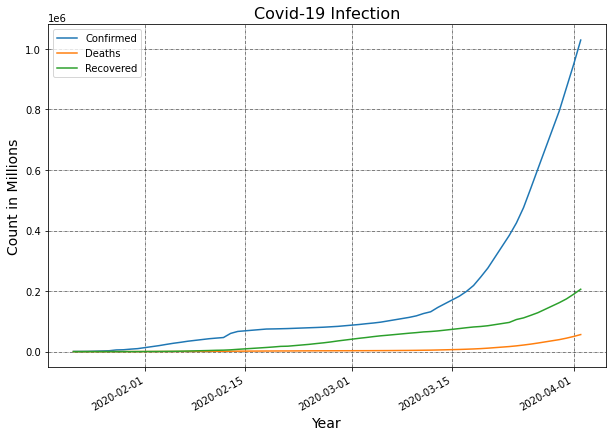

In [29]:
# Plot all the close prices
CDR_df.plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Covid-19 Infection", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Count in Millions', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [30]:
DSN_df = covid_yfinance_df[['Dow Jones Industrial', 'S&P 500 Index', 'Nasdaq Composite']]

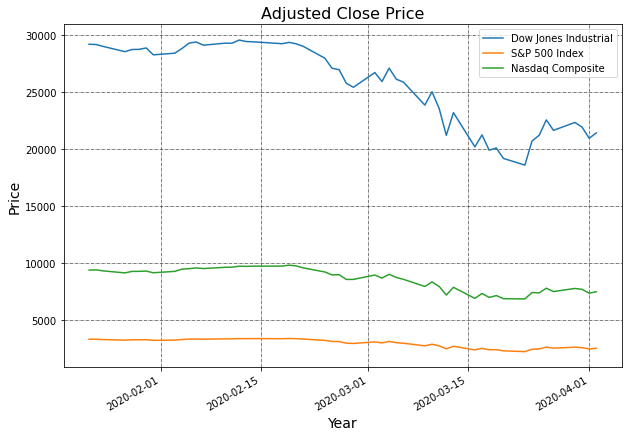

In [31]:
# Plot all the close prices
DSN_df.plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [32]:
Dow_stocks = covid_yfinance_df[['Apple Inc','American Express Co','Boeing Co', 'Caterpillar Inc', 'Cisco Systems Inc', 'Chevron Corp', 'Walt Disney Co',
                     'Dow Inc', 'Goldman Sachs Group Inc', 'Home Depot Inc', 'International Business Machines Corp', 'Intel Corp', 'Johnson & Johnson', 
                     'JPMorgan Chase & Co', 'Coca-Cola Co', 'McDonalds Corp', '3M Co', 'Merck & Co Inc', 'Microsoft Corp', 'Nike Inc', 'Pfizer Inc', 
                     'Procter & Gamble Co', 'Travelers Companies Inc', 'UnitedHealth Group Inc', 'United Technologies Corp', 'Visa Inc', 'Verizon Communications Inc', 
                     'Walgreens Boots Alliance Inc', 'Walmart Inc', 'Exxon Mobil Corp']]

In [33]:
Dow_stocks.head()

,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,78.880821,129.631561,307.172424,140.281845,47.788422,108.418045,144.009995,48.417595,242.554764,228.772476,138.702393,61.653240,145.329254,132.737137,56.140545,207.519287,173.123749,87.577286,164.392303,103.711861,39.009773,123.949982,138.436844,296.787109,153.061584,206.939453,58.549107,51.768364,114.611137,63.722034
2020-01-23,79.260696,129.513260,315.910431,140.399872,47.720245,108.610100,142.199997,47.827484,241.111496,229.509186,137.719177,62.233116,145.603714,132.601166,56.354935,209.462570,172.841766,86.512489,165.404251,102.252808,39.514500,123.383362,131.433716,295.671417,153.071548,205.565857,58.578144,51.652073,114.324860,63.323708
2020-01-24,79.032265,133.200394,321.139313,138.068878,47.574165,107.409721,140.080002,46.152336,237.518097,227.888428,135.492432,67.294716,145.397873,129.308960,56.208755,207.323013,173.240448,83.992149,163.737518,101.270180,38.650639,123.531441,132.011597,289.105560,152.464432,204.052856,58.355484,50.431034,112.903328,62.896938
2020-01-27,76.708298,128.793579,314.727478,133.495438,46.230209,106.007683,135.899994,44.905491,233.806870,227.092789,133.622391,64.562439,145.819382,128.221283,56.013859,205.458237,170.789902,84.109367,160.999283,99.493507,38.980652,124.074371,130.983154,280.495880,150.314651,200.758163,57.997299,50.615158,114.374222,61.398491
2020-01-28,78.878326,130.577988,314.687714,134.488815,46.522373,106.708702,138.369995,44.886452,238.166092,229.715469,134.518860,66.154625,146.554626,130.552032,55.555847,206.488754,161.016861,84.255890,164.154221,99.662247,37.019978,124.409996,131.629608,282.253357,152.135986,201.912811,58.762077,51.148155,115.104721,61.313137


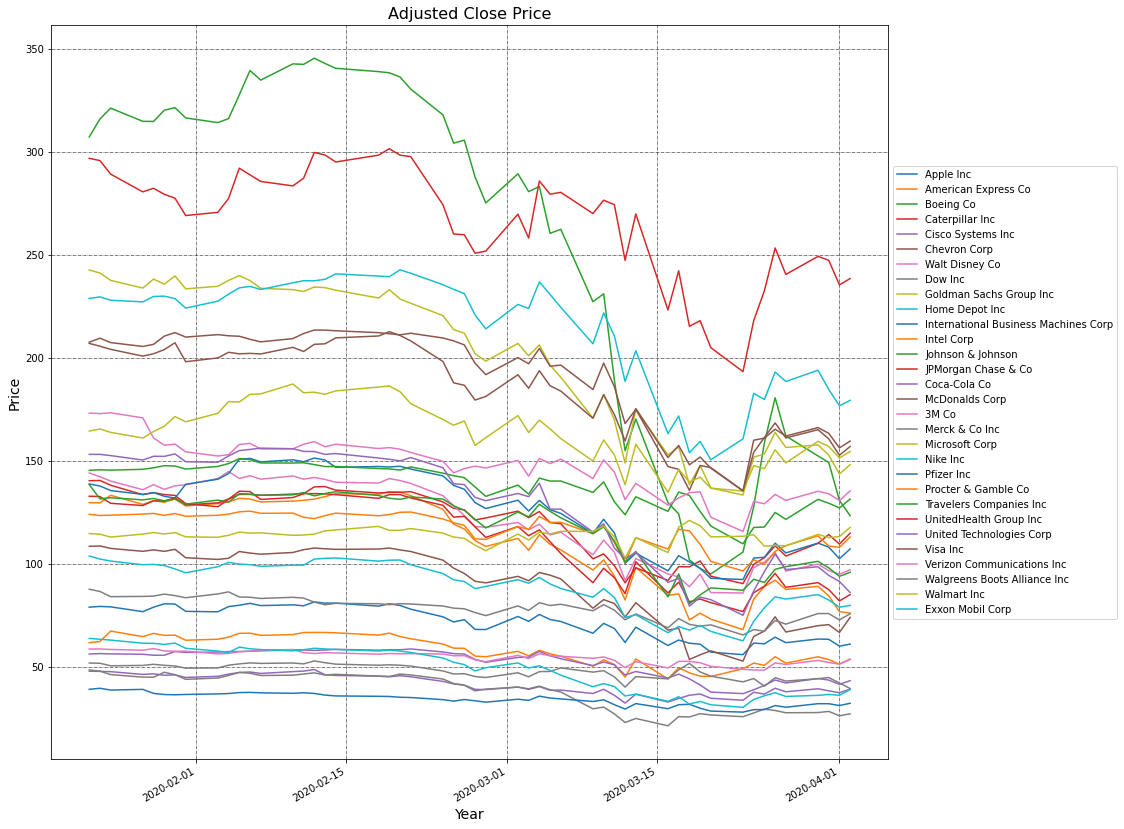

In [34]:
# Plot all the close prices
Dow_stocks.plot(figsize=(15, 15))
# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [35]:
# Whole dataframe correlation examination
covid_yfinance_df[['Confirmed', 'Deaths', 'Recovered', 'Dow Jones Industrial', 'S&P 500 Index', 'Nasdaq Composite']].corr()

,Confirmed,Deaths,Recovered,Dow Jones Industrial,S&P 500 Index,Nasdaq Composite
Confirmed,1.000000,0.996514,0.951726,-0.676587,-0.674923,-0.640627
Deaths,0.996514,1.000000,0.934455,-0.635563,-0.634905,-0.602993
Recovered,0.951726,0.934455,1.000000,-0.836292,-0.834558,-0.808582
Dow Jones Industrial,-0.676587,-0.635563,-0.836292,1.000000,0.999024,0.993316
S&P 500 Index,-0.674923,-0.634905,-0.834558,0.999024,1.000000,0.996097
Nasdaq Composite,-0.640627,-0.602993,-0.808582,0.993316,0.996097,1.000000


In [36]:
# Whole dataframe correlation examination
covid_corr = covid_yfinance_df.corr()

In [37]:
covid_corr

,Confirmed,Deaths,Recovered,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp,Dow Jones Industrial,S&P 500 Index,Nasdaq Composite
Confirmed,1.000000,0.996514,0.951726,-0.696872,-0.701891,-0.699885,-0.496524,-0.489057,-0.671015,-0.660233,-0.651739,-0.711910,-0.635355,-0.627772,-0.502179,-0.635633,-0.695178,-0.742254,-0.674333,-0.652915,-0.588834,-0.463882,-0.531661,-0.598195,-0.606640,-0.685494,-0.577337,-0.712104,-0.671435,-0.605435,-0.702113,-0.099718,-0.663671,-0.676587,-0.674923,-0.640627
Deaths,0.996514,1.000000,0.934455,-0.658393,-0.665250,-0.663910,-0.447461,-0.443270,-0.626368,-0.618985,-0.611482,-0.670132,-0.601608,-0.592006,-0.459545,-0.588265,-0.656837,-0.704540,-0.635339,-0.604366,-0.533129,-0.432703,-0.487796,-0.544909,-0.561790,-0.644987,-0.541504,-0.672530,-0.633345,-0.553751,-0.681168,-0.084061,-0.615363,-0.635563,-0.634905,-0.602993
Recovered,0.951726,0.934455,1.000000,-0.844551,-0.862532,-0.848393,-0.705403,-0.716191,-0.824698,-0.842719,-0.830956,-0.873705,-0.759205,-0.798148,-0.721771,-0.776632,-0.862725,-0.845176,-0.808279,-0.787145,-0.733400,-0.647407,-0.722806,-0.759304,-0.736069,-0.822898,-0.696567,-0.865019,-0.825065,-0.754492,-0.801872,-0.140494,-0.838556,-0.836292,-0.834558,-0.808582
Apple Inc,-0.696872,-0.658393,-0.844551,1.000000,0.977086,0.958156,0.919618,0.917195,0.970655,0.969362,0.945100,0.975883,0.931477,0.950901,0.941419,0.941983,0.969088,0.950647,0.948255,0.920013,0.914152,0.908145,0.948147,0.927704,0.917795,0.956484,0.926940,0.972803,0.986208,0.926114,0.834877,0.314257,0.960864,0.985689,0.985237,0.978860
American Express Co,-0.701891,-0.665250,-0.862532,0.977086,1.000000,0.980159,0.931808,0.916708,0.982480,0.986705,0.962658,0.990324,0.936919,0.962132,0.945743,0.920901,0.989782,0.947789,0.959867,0.904651,0.883830,0.893096,0.955737,0.903802,0.886788,0.963231,0.897993,0.989548,0.988038,0.895869,0.789404,0.214438,0.973024,0.990633,0.989608,0.982646
Boeing Co,-0.699885,-0.663910,-0.848393,0.958156,0.980159,1.000000,0.926795,0.877054,0.977931,0.964209,0.960920,0.973397,0.963958,0.972206,0.918211,0.903433,0.976187,0.964299,0.978311,0.876849,0.863241,0.898530,0.953201,0.881633,0.861819,0.979688,0.883645,0.990769,0.971103,0.877757,0.740036,0.173294,0.958591,0.986891,0.985965,0.982754
Caterpillar Inc,-0.496524,-0.447461,-0.705403,0.919618,0.931808,0.926795,1.000000,0.942626,0.936507,0.947646,0.970399,0.942750,0.873615,0.931899,0.943876,0.889431,0.947352,0.875503,0.897953,0.893908,0.866036,0.879268,0.957846,0.911990,0.871631,0.913884,0.832043,0.933379,0.932937,0.901977,0.737536,0.291990,0.961523,0.948745,0.950884,0.951899
Cisco Systems Inc,-0.489057,-0.443270,-0.716191,0.917195,0.916708,0.877054,0.942626,1.000000,0.891789,0.954035,0.933249,0.927650,0.806176,0.906350,0.964885,0.874011,0.922434,0.807896,0.845388,0.886127,0.867274,0.861998,0.929099,0.919330,0.849023,0.861622,0.808685,0.902927,0.909032,0.895273,0.803333,0.338125,0.936326,0.920610,0.918666,0.919415
Chevron Corp,-0.671015,-0.626368,-0.824698,0.970655,0.982480,0.977931,0.936507,0.891789,1.000000,0.968497,0.949962,0.980516,0.955681,0.950944,0.928449,0.922308,0.976066,0.960016,0.973634,0.917625,0.911566,0.882246,0.959613,0.915729,0.882020,0.979877,0.920031,0.986898,0.983582,0.905942,0.731671,0.181549,0.976012,0.989739,0.986874,0.977062
Walt Disney Co,-0.660233,-0.618985,-0.842719,0.969362,0.986705,0.964209,0.947646,0.954035,0.968497,1.000000,0.972121,0.989174,0.905428,0.965128,0.955760,0.917063,0.985476,0.921414,0.939807,0.907466,0.893205,0.893435,0.957137,0.919166,0.880385,0.945028,0.868911,0.97910

In [38]:
# Returning only first and last row from dataframe
p_change_df = Dow_stocks.iloc[[0, -1]]
p_change_df

,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,78.880821,129.631561,307.172424,140.281845,47.788422,108.418045,144.009995,48.417595,242.554764,228.772476,138.702393,61.653240,145.329254,132.737137,56.140545,207.519287,173.123749,87.577286,164.392303,103.711861,39.009773,123.949982,138.436844,296.787109,153.061584,206.939453,58.549107,51.768364,114.611137,63.722034
2020-04-02,60.957287,75.996323,123.269997,114.818069,39.128021,73.952522,96.970001,27.119665,148.101944,179.288315,107.141441,53.680141,131.359055,84.985565,43.204582,159.497238,135.323853,75.713112,154.455414,79.763885,32.230644,112.929489,95.823105,238.426422,86.010002,156.889725,53.486080,39.414963,117.646706,38.864849


In [39]:
# Find percent of change between First and Last dates
Percent_df = p_change_df.pct_change(axis='rows')
Percent_df

,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,-0.227223,-0.413751,-0.598694,-0.181519,-0.181224,-0.317895,-0.326644,-0.43988,-0.389408,-0.216303,-0.227544,-0.129322,-0.096128,-0.359745,-0.230421,-0.23141,-0.21834,-0.135471,-0.060446,-0.230909,-0.17378,-0.088911,-0.307821,-0.196642,-0.438069,-0.241857,-0.086475,-0.238628,0.026486,-0.390088


In [40]:
# Transpose dataframe
transposed_df = Percent_df.T
print(transposed_df)

Date                                  2020-01-22  2020-04-02
Apple Inc                                    NaN   -0.227223
American Express Co                          NaN   -0.413751
Boeing Co                                    NaN   -0.598694
Caterpillar Inc                              NaN   -0.181519
Cisco Systems Inc                            NaN   -0.181224
Chevron Corp                                 NaN   -0.317895
Walt Disney Co                               NaN   -0.326644
Dow Inc                                      NaN   -0.439880
Goldman Sachs Group Inc                      NaN   -0.389408
Home Depot Inc                               NaN   -0.216303
International Business Machines Corp         NaN   -0.227544
Intel Corp                                   NaN   -0.129322
Johnson & Johnson                            NaN   -0.096128
JPMorgan Chase & Co                          NaN   -0.359745
Coca-Cola Co                                 NaN   -0.230421
McDonalds Corp          

In [41]:
# Select all rows and the last column
trans_df = transposed_df.iloc[:, -1]

In [42]:
trans_df

Apple Inc                              -0.227223
American Express Co                    -0.413751
Boeing Co                              -0.598694
Caterpillar Inc                        -0.181519
Cisco Systems Inc                      -0.181224
Chevron Corp                           -0.317895
Walt Disney Co                         -0.326644
Dow Inc                                -0.439880
Goldman Sachs Group Inc                -0.389408
Home Depot Inc                         -0.216303
International Business Machines Corp   -0.227544
Intel Corp                             -0.129322
Johnson & Johnson                      -0.096128
JPMorgan Chase & Co                    -0.359745
Coca-Cola Co                           -0.230421
McDonalds Corp                         -0.231410
3M Co                                  -0.218340
Merck & Co Inc                         -0.135471
Microsoft Corp                         -0.060446
Nike Inc                               -0.230909
Pfizer Inc          

In [43]:
trans_df=trans_df*100

In [44]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}%'.format

In [45]:
trans_df

Apple Inc                              -22.72%
American Express Co                    -41.38%
Boeing Co                              -59.87%
Caterpillar Inc                        -18.15%
Cisco Systems Inc                      -18.12%
Chevron Corp                           -31.79%
Walt Disney Co                         -32.66%
Dow Inc                                -43.99%
Goldman Sachs Group Inc                -38.94%
Home Depot Inc                         -21.63%
International Business Machines Corp   -22.75%
Intel Corp                             -12.93%
Johnson & Johnson                       -9.61%
JPMorgan Chase & Co                    -35.97%
Coca-Cola Co                           -23.04%
McDonalds Corp                         -23.14%
3M Co                                  -21.83%
Merck & Co Inc                         -13.55%
Microsoft Corp                          -6.04%
Nike Inc                               -23.09%
Pfizer Inc                             -17.38%
Procter & Gam

In [46]:
# Sort dataframe by Largest stock market loss to smallest
test = trans_df.sort_values(ascending=True)
print(test)

Boeing Co                              -59.87%
Dow Inc                                -43.99%
United Technologies Corp               -43.81%
American Express Co                    -41.38%
Exxon Mobil Corp                       -39.01%
Goldman Sachs Group Inc                -38.94%
JPMorgan Chase & Co                    -35.97%
Walt Disney Co                         -32.66%
Chevron Corp                           -31.79%
Travelers Companies Inc                -30.78%
Visa Inc                               -24.19%
Walgreens Boots Alliance Inc           -23.86%
McDonalds Corp                         -23.14%
Nike Inc                               -23.09%
Coca-Cola Co                           -23.04%
International Business Machines Corp   -22.75%
Apple Inc                              -22.72%
3M Co                                  -21.83%
Home Depot Inc                         -21.63%
UnitedHealth Group Inc                 -19.66%
Caterpillar Inc                        -18.15%
Cisco Systems

In [47]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}'.format

In [48]:
CDR_corr = covid_corr.iloc[3:, : 3]

In [49]:
# Merge by Index
corr_loss = pd.merge(CDR_corr, test, how='inner', left_index=True, right_index=True)
corr_loss

,Confirmed,Deaths,Recovered,2020-04-02 00:00:00
Apple Inc,-0.70,-0.66,-0.84,-22.72
American Express Co,-0.70,-0.67,-0.86,-41.38
Boeing Co,-0.70,-0.66,-0.85,-59.87
Caterpillar Inc,-0.50,-0.45,-0.71,-18.15
Cisco Systems Inc,-0.49,-0.44,-0.72,-18.12
Chevron Corp,-0.67,-0.63,-0.82,-31.79
Walt Disney Co,-0.66,-0.62,-0.84,-32.66
Dow Inc,-0.65,-0.61,-0.83,-43.99
Goldman Sachs Group Inc,-0.71,-0.67,-0.87,-38.94
Home Depot Inc,-0.64,-0.60,-0.76,-21.63


In [50]:
# Rename Columns
corr_loss.columns = ['Confirmed', 'Deaths', 'Recovered', '% Loss']
corr_loss

,Confirmed,Deaths,Recovered,% Loss
Apple Inc,-0.70,-0.66,-0.84,-22.72
American Express Co,-0.70,-0.67,-0.86,-41.38
Boeing Co,-0.70,-0.66,-0.85,-59.87
Caterpillar Inc,-0.50,-0.45,-0.71,-18.15
Cisco Systems Inc,-0.49,-0.44,-0.72,-18.12
Chevron Corp,-0.67,-0.63,-0.82,-31.79
Walt Disney Co,-0.66,-0.62,-0.84,-32.66
Dow Inc,-0.65,-0.61,-0.83,-43.99
Goldman Sachs Group Inc,-0.71,-0.67,-0.87,-38.94
Home Depot Inc,-0.64,-0.60,-0.76,-21.63


In [51]:
corr_loss = corr_loss.round(decimals=2)

In [52]:
corr_loss[['Confirmed', 'Deaths', 'Recovered']] = corr_loss[['Confirmed', 'Deaths', 'Recovered']].astype(str)

In [53]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}%'.format

In [54]:
corr_loss

,Confirmed,Deaths,Recovered,% Loss
Apple Inc,-0.7,-0.66,-0.84,-22.72%
American Express Co,-0.7,-0.67,-0.86,-41.38%
Boeing Co,-0.7,-0.66,-0.85,-59.87%
Caterpillar Inc,-0.5,-0.45,-0.71,-18.15%
Cisco Systems Inc,-0.49,-0.44,-0.72,-18.12%
Chevron Corp,-0.67,-0.63,-0.82,-31.79%
Walt Disney Co,-0.66,-0.62,-0.84,-32.66%
Dow Inc,-0.65,-0.61,-0.83,-43.99%
Goldman Sachs Group Inc,-0.71,-0.67,-0.87,-38.94%
Home Depot Inc,-0.64,-0.6,-0.76,-21.63%


In [55]:
# Sort by % Loss Highest to Lowest
corr_loss = corr_loss.sort_values('% Loss', ascending=True)
corr_loss

,Confirmed,Deaths,Recovered,% Loss
Boeing Co,-0.7,-0.66,-0.85,-59.87%
Dow Inc,-0.65,-0.61,-0.83,-43.99%
United Technologies Corp,-0.71,-0.67,-0.87,-43.81%
American Express Co,-0.7,-0.67,-0.86,-41.38%
Exxon Mobil Corp,-0.66,-0.62,-0.84,-39.01%
Goldman Sachs Group Inc,-0.71,-0.67,-0.87,-38.94%
JPMorgan Chase & Co,-0.7,-0.66,-0.86,-35.97%
Walt Disney Co,-0.66,-0.62,-0.84,-32.66%
Chevron Corp,-0.67,-0.63,-0.82,-31.79%
Travelers Companies Inc,-0.69,-0.64,-0.82,-30.78%


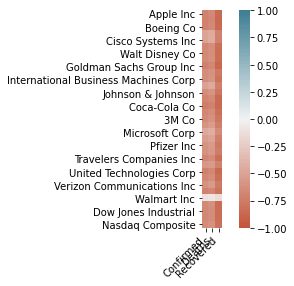

In [56]:
ax = sns.heatmap(
    CDR_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [57]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}'.format

In [58]:
# Confirmed and Walmart Correlation Coefficient and p-value
stats.pearsonr(covid_yfinance_df['Confirmed'], covid_yfinance_df['Walmart Inc'])

(-0.09971818008981313, 0.4862948352155995)

There is not a statistical significance between Confirmed cases and Walmart Inc due to the p-value being near .5 and a correlation coefficient of -.099 which indicates a slight negative correlation.

Walmart has a stock loss of 2.65%

In [59]:
# Confirmed and Microsoft correlation coefficient and p-value
stats.pearsonr(covid_yfinance_df['Confirmed'], covid_yfinance_df['Microsoft Corp'])

(-0.4638818771385725, 0.0006067816367546997)

There is a statistical significance between Confirmed and Microsoft Corp due to the p-value being so small and a correlation coefficient of -.463 which indicates a negative correlation.

Microsoft has a stock loss of 6.04%

In [60]:
# Confirmed and Boeing correlation coefficient and p-value
stats.pearsonr(covid_yfinance_df['Confirmed'], covid_yfinance_df['Boeing Co'])

(-0.6998845946012755, 1.0963951330114494e-08)

There is a statistical significance between saleprice and lotarea due to the p-value being so small and a correlation coefficient of -.699 which indicates a strong negative correlation.

Boeing has a stock loss of 59.87%

# Stocks with least correlation to the infection rate of the coronavirus(covid-19) also have least drop in stock price.

Walmart has the least correlation and % stock market loss

Boeing has the highest correlation and % stock market loss

## Next Steps:

1. Evaluate which sectors/markets have the highest correlation to covid-19 infection rate
2. Input all of S&P 500 stocks into dataframe